In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("/content/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [ ]:
cat_cols = ['sales_channel', 'trip_type', 'flight_day', 'route', 'booking_origin']
num_cols = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour','wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration']


In [ ]:
df.fillna(df.mode().iloc[0], inplace=True)

In [ ]:
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [ ]:
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

In [ ]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


Data visualisation

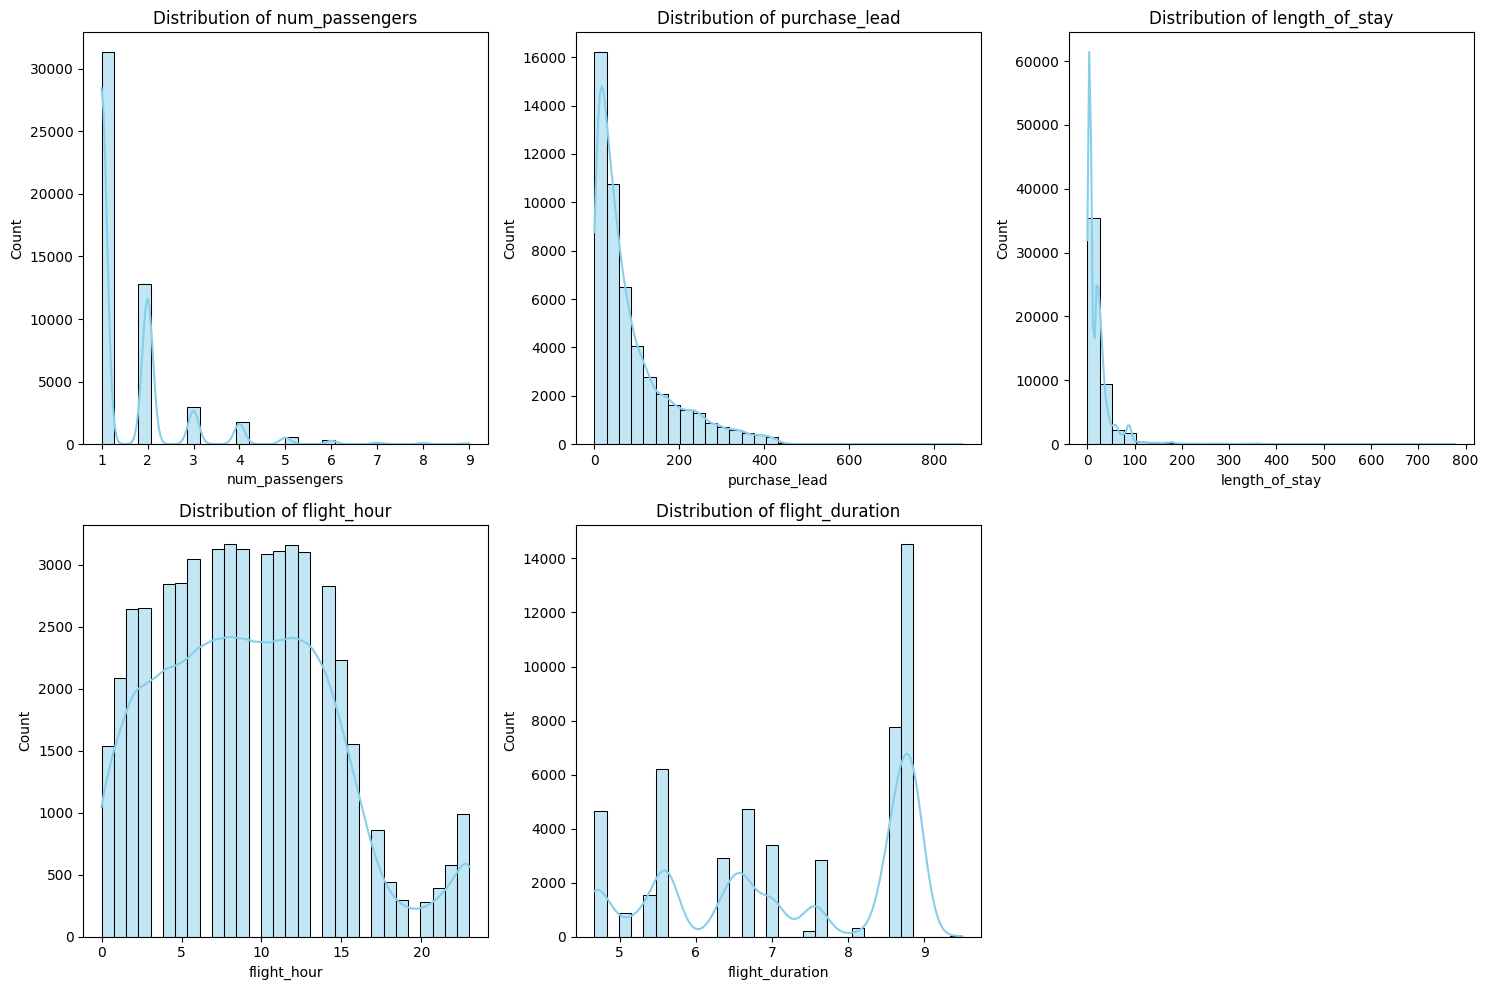

In [ ]:
num_cols = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']

plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

<ipython-input-12-bc1e04b3ecf1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='booking_complete', data=df, palette='Set2')


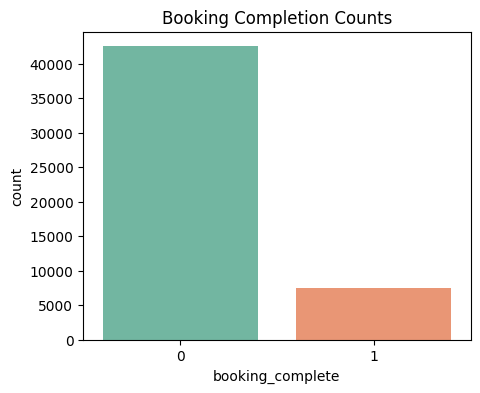

In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x='booking_complete', data=df, palette='Set2')
plt.title('Booking Completion Counts')
plt.show()

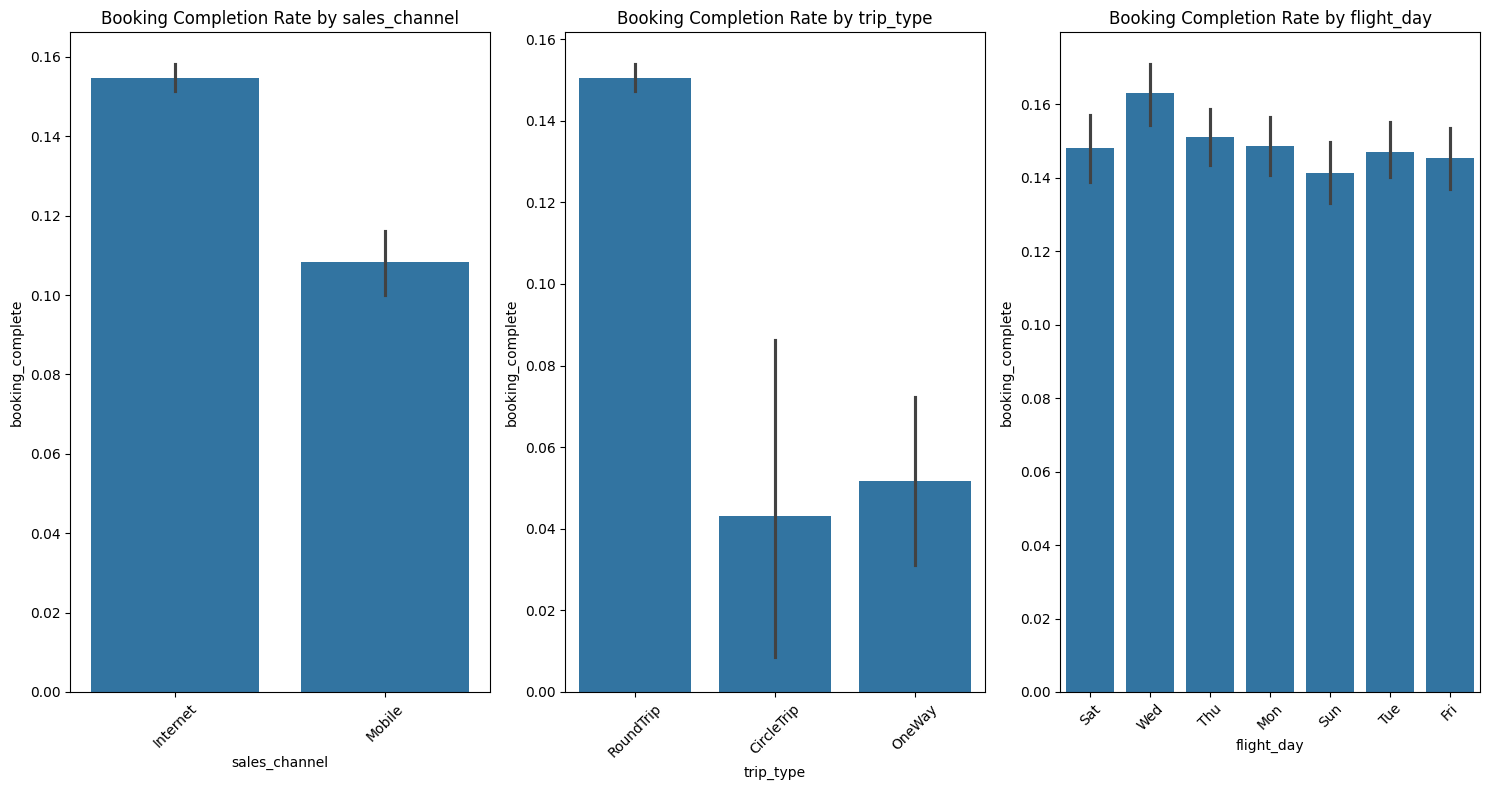

In [ ]:
cat_cols_filtered = [col for col in cat_cols if col not in ['route', 'booking_origin']]

plt.figure(figsize=(15,8))
for i, col in enumerate(cat_cols_filtered, 1):
    plt.subplot(1, len(cat_cols_filtered), i)
    sns.barplot(x=col, y='booking_complete', data=df, estimator=lambda x: sum(x)/len(x))
    plt.title(f'Booking Completion Rate by {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

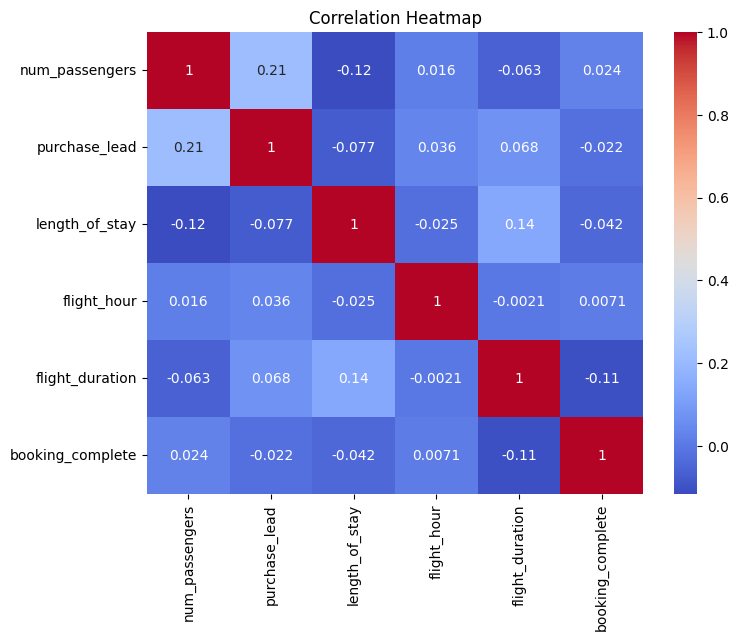

In [ ]:
plt.figure(figsize=(8,6))
corr = df[num_cols + ['booking_complete']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

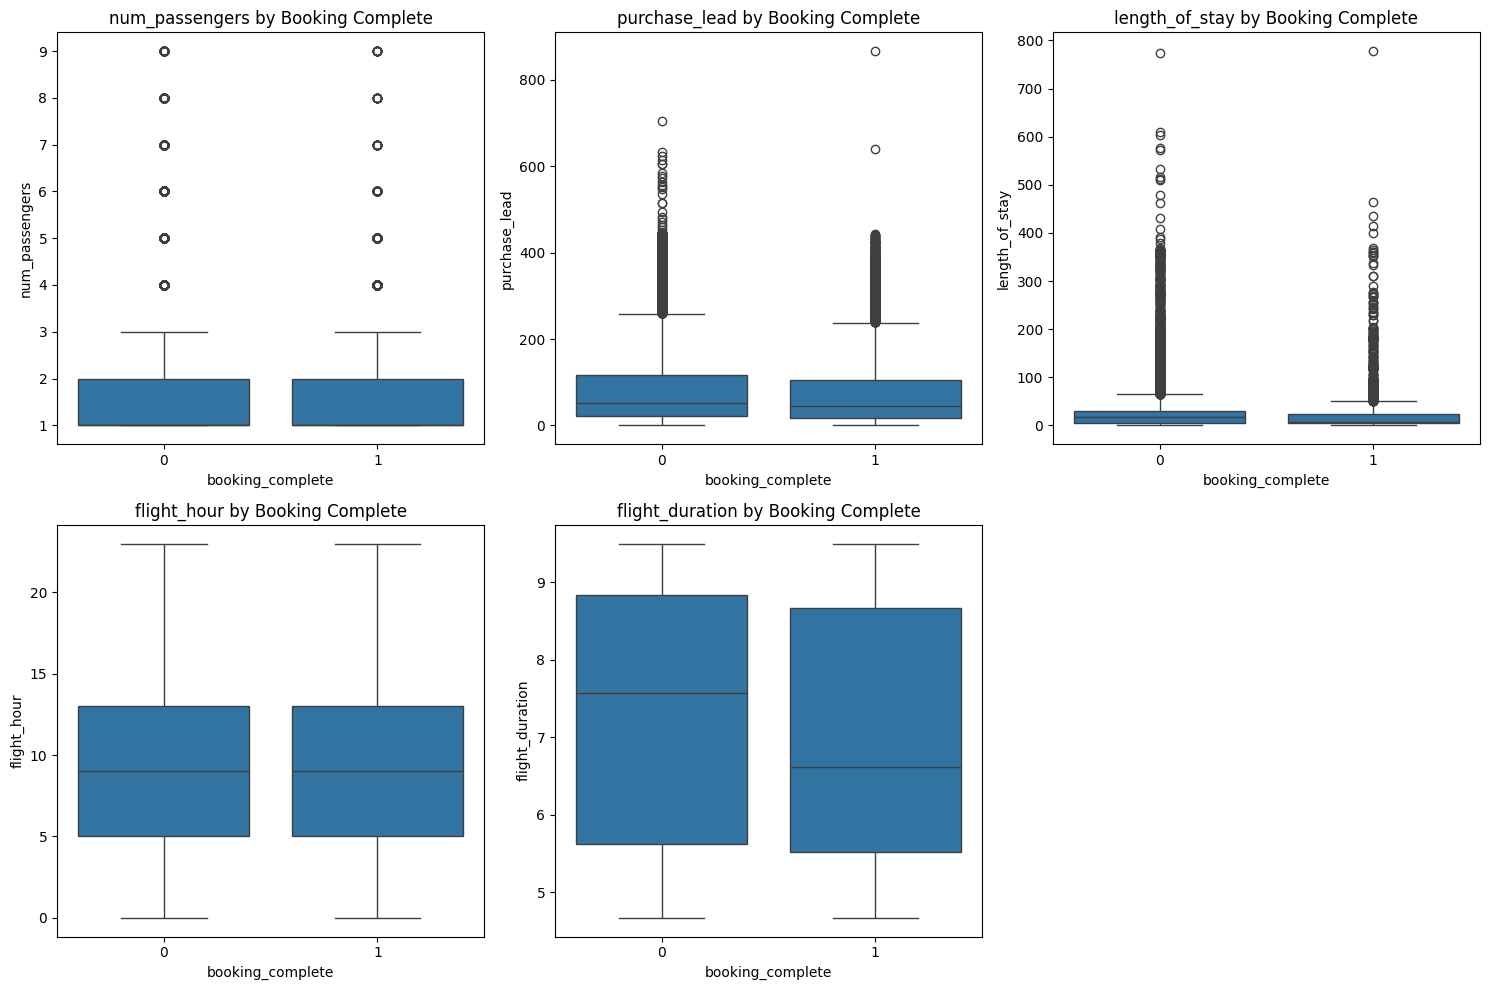

In [ ]:
plt.figure(figsize=(15,10))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='booking_complete', y=col, data=df)
    plt.title(f'{col} by Booking Complete')
plt.tight_layout()
plt.show()

Model implementation

In [ ]:
# Define features and target
X = df_encoded.drop('booking_complete', axis=1)
y = df_encoded['booking_complete']



In [ ]:
# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_dist = {
    'n_estimators': [50, 75, 100],           # lower for speed
    'max_depth': [10, 15, 20],               # limit depth for performance
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']         # efficient feature subsets
}


In [ ]:
# Initialize Random Forest with balanced class weights
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')



In [ ]:
random_search = RandomizedSearchCV(
    estimator=rf_model, param_distributions=param_dist,
    n_iter=10,  # number of parameter settings sampled
    scoring='roc_auc', cv=3, verbose=2, n_jobs=-1, random_state=42
)

random_search.fit(X_train, y_train)

print("Best parameters:", random_search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20}


In [ ]:
# Best model
best_rf = random_search.best_estimator_

In [ ]:
# Evaluate on test data
from sklearn.metrics import roc_auc_score
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]
print(f"Test ROC AUC after tuning: {roc_auc_score(y_test, y_pred_proba):.4f}")

Test ROC AUC after tuning: 0.7770


In [ ]:
# Stratified cross-validation for ROC AUC
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(rf_model, X_train, y_train, cv=cv, scoring='roc_auc')

print(f'Cross-validated ROC AUC scores: {scores}')
print(f'Average ROC AUC: {scores.mean():.4f}')



Cross-validated ROC AUC scores: [0.76599055 0.78028591 0.78369313 0.78191945 0.77030427]
Average ROC AUC: 0.7764


In [ ]:
# Train on full training set
rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [ ]:
# Evaluate on test set
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
test_roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'Test ROC AUC: {test_roc_auc:.4f}')



Test ROC AUC: 0.7796


In [ ]:
from sklearn.metrics import accuracy_score

# Predict the class labels for the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Random Forest Accuracy on test set: {accuracy:.4f}")

Random Forest Accuracy on test set: 0.8507


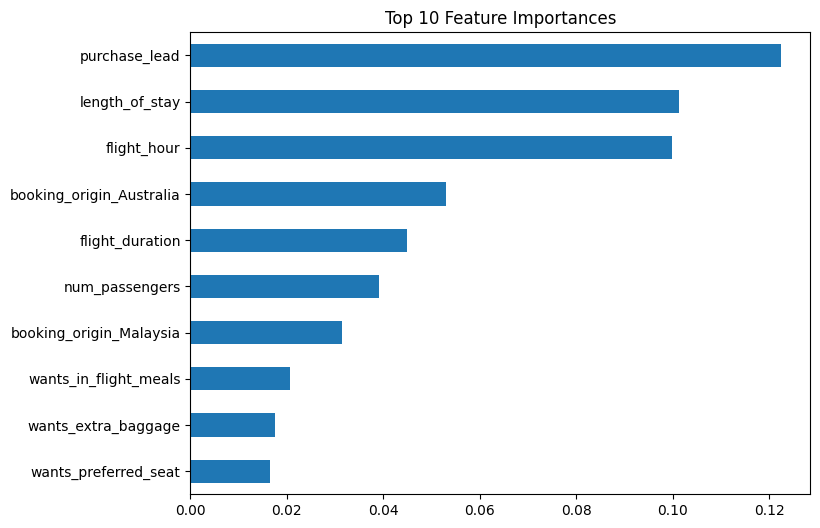

In [ ]:
# Feature importance plot
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=True)
importances.tail(10).plot(kind='barh', figsize=(8,6))
plt.title('Top 10 Feature Importances')
plt.show()